In [34]:
#Import Dependencies
import pandas as pd
import numpy as np 

# data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

# Algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn import linear_model, tree
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier,LassoCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("C:/Users/jonal/OneDrive/Documents/FranklinU/DATA695/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv")

In [32]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
dffeatures = pd.get_dummies(data.iloc[:,0:16])

In [50]:
scaler = MinMaxScaler()
scaler.fit(dffeatures)

MinMaxScaler()

In [51]:
scaledfeat = scaler.transform(dffeatures)

In [56]:
pd.DataFrame(scaledfeat)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
dftarget = data['NObeyesdad']

In [60]:
# X -> features
# y -> label
X = pd.DataFrame(scaledfeat)
y = dftarget
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)
  
# training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=dtree_model.classes_)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Obesity_Type_II'),
  Text(4, 0, 'Obesity_Type_III'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Overweight_Level_II')])

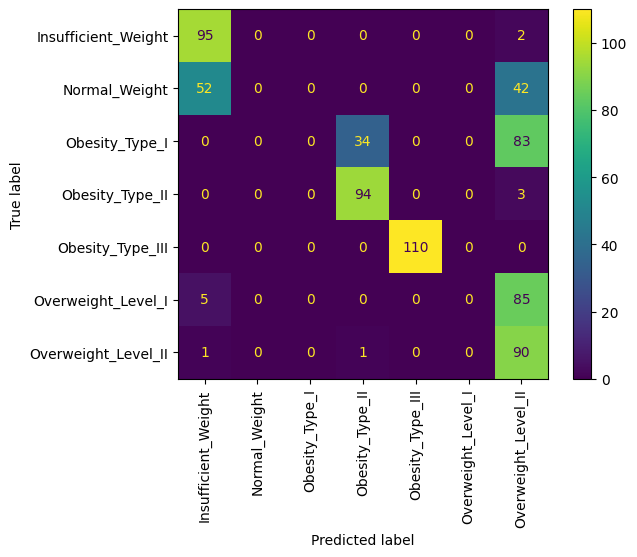

In [62]:
disp.plot()
plt.xticks(rotation = 90)

In [27]:

gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
  
# creating a confusion matrix
cm_nb = confusion_matrix(y_test, gnb_predictions)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Obesity_Type_II'),
  Text(4, 0, 'Obesity_Type_III'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Overweight_Level_II')])

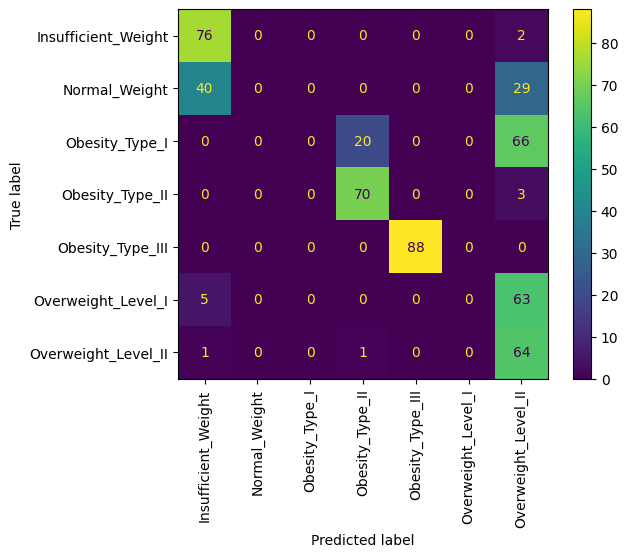

In [30]:
nb_disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=dtree_model.classes_)
nb_disp.plot()
plt.xticks(rotation = 90)